Dataset Link = https://drive.google.com/drive/folders/1yko1IEdlXaT1pGdywyrZXIwsNusNN_y3?usp=drive_link

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)
df.head()


Saving AB_NYC_2019.csv to AB_NYC_2019 (2).csv


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.info()
print(df.describe())
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [ ]:
df['name'].fillna('Unknown', inplace=True)
df['host_name'].fillna('Unknown', inplace=True)


In [ ]:
df['last_review'] = pd.to_datetime(df['last_review'])
df['last_review'].fillna(df['last_review'].median(), inplace=True)


In [ ]:
df['reviews_per_month'].fillna(0, inplace=True)


In [ ]:
print("Before:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("After:", df.duplicated().sum())


Before: 0
After: 0


In [ ]:
text_cols = ['neighbourhood_group','neighbourhood','room_type']
for col in text_cols:
    df[col] = df[col].str.lower()


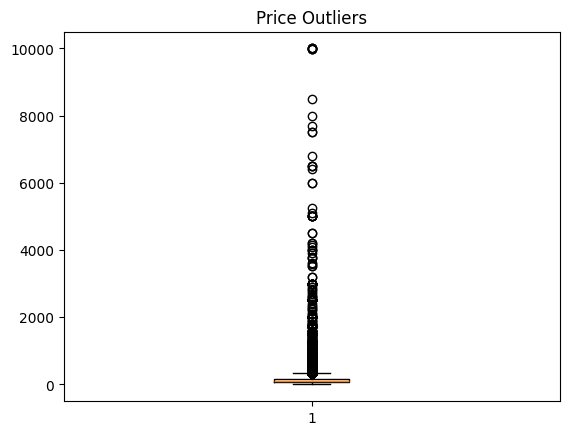

In [ ]:
plt.boxplot(df['price'])
plt.title("Price Outliers")
plt.show()


In [ ]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

df = df[(df['price'] >= lower) & (df['price'] <= upper)]


In [ ]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 45923 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              45923 non-null  int64         
 1   name                            45923 non-null  object        
 2   host_id                         45923 non-null  int64         
 3   host_name                       45923 non-null  object        
 4   neighbourhood_group             45923 non-null  object        
 5   neighbourhood                   45923 non-null  object        
 6   latitude                        45923 non-null  float64       
 7   longitude                       45923 non-null  float64       
 8   room_type                       45923 non-null  object        
 9   price                           45923 non-null  int64         
 10  minimum_nights                  45923 non-null  int64         
 11  number_

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [ ]:
df2 = df.copy()
df2

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,brooklyn,kensington,40.64749,-73.97237,private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,manhattan,midtown,40.75362,-73.98377,entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,manhattan,harlem,40.80902,-73.94190,private room,150,3,0,2019-05-19,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,brooklyn,clinton hill,40.68514,-73.95976,entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,manhattan,east harlem,40.79851,-73.94399,entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,brooklyn,bedford-stuyvesant,40.67853,-73.94995,private room,70,2,0,2019-05-19,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,brooklyn,bushwick,40.70184,-73.93317,private room,40,4,0,2019-05-19,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,manhattan,harlem,40.81475,-73.94867,entire home/apt,115,10,0,2019-05-19,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,manhattan,hell's kitchen,40.75751,-73.99112,shared room,55,1,0,2019-05-19,0.00,6,2


**DATA CLEANING SUMMARY**

✔ Missing values handled (name, host_name, last_review, reviews_per_month)
✔ Duplicate records removed
✔ Text fields standardized
✔ Extreme price outliers eliminated
✔ Dataset cleaned and exported

This dataset is now analysis-ready and model-ready.

